# Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [5]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

---
## Create your Tree model

If you take a look at the parameters the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) can take, you might be surprised so, let's look at some of them.

- **criterion:** This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.

- **splitter:** This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered. The split will then be made by the best feature within the random subset. The size of the random subset is determined by the max_features parameter. This is partly where a Random Forest gets its name.

- **max_depth:** This determines the maximum depth of the tree. The default value is set to none. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting.

- **min_samples_split:** The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to regularize your tree.

- **min_samples_leaf:** The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree.

- **max_features:** The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features available to make the best split. Depending on your application, it’s often a good idea to tune this parameter. [Here is an article](https://stats.stackexchange.com/questions/324370/references-on-number-of-features-to-use-in-random-forest-regression) that recommends how to set max_features.

In [22]:
tree_model = DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=6, random_state=10)
tree_model.fit(X_train, y_train);

Something that we can observe once the model has been trained is the importance of each of the features. This allows us to observe which were the features that facilitated or contributed more to the model.

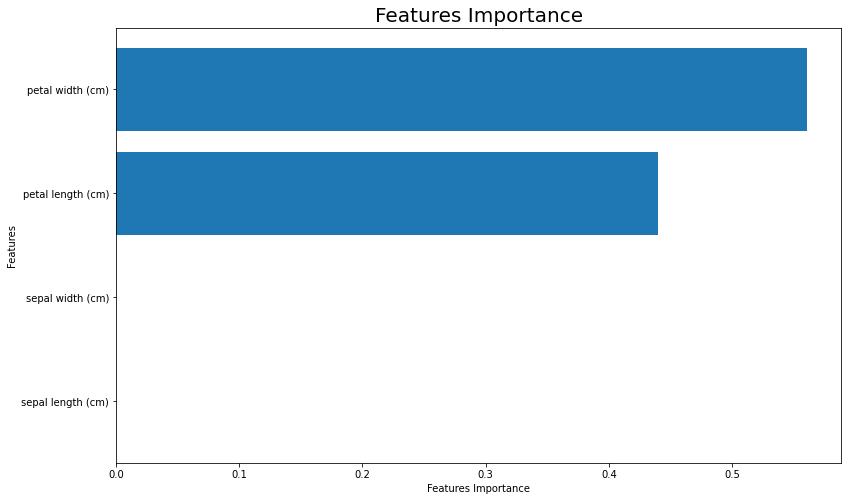

In [23]:
plt.figure(figsize=(13, 8))
caract = iris.data.shape[1]
plt.barh(range(caract), tree_model.feature_importances_)
plt.yticks(np.arange(caract), iris.feature_names)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Features Importance', fontsize=20)
plt.show()

Another thing we can do is visualize the decision tree that we just trained

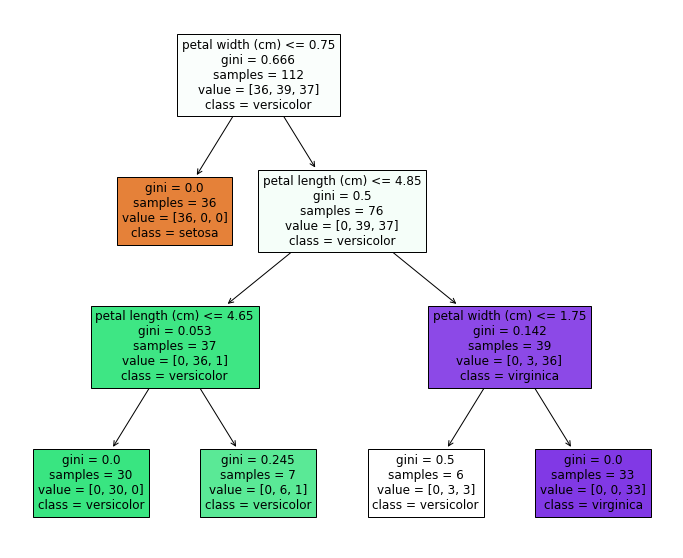

In [24]:
from sklearn import tree

plt.figure(figsize=(12, 10))
tree.plot_tree(tree_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Once the model is trained, we must use it to predict data never seen before

In [25]:
y_pred_dt = tree_model.predict(X_test)
y_pred_dt

array([0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

And compare them with the real target label

In [26]:
y_test

array([0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2])

In [29]:
y_pred_dt == y_test

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
        False, False]), 38)

In [32]:
# Using this formula we can measure the % of correctly classified samples
# We will see later better ways to measure our classifier perfomance
y_pred_train = tree_model.predict(X_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Train Accuracy: {100 * accuracy:.2f}%")

Train Accuracy: 96.43%


In [31]:
# Using this formula we can measure the % of correctly classified samples
# We will see later better ways to measure our classifier perfomance
accuracy = sum(y_pred_dt == y_test) / len(y_pred_dt)
print(f"Test Accuracy: {100 * accuracy:.2f}%")

Test Accuracy: 92.11%


**Advanced Tip:** You can use the code below to analyze further how our Tree Model is classifying your data. This snippet will display the model decision boundaries.

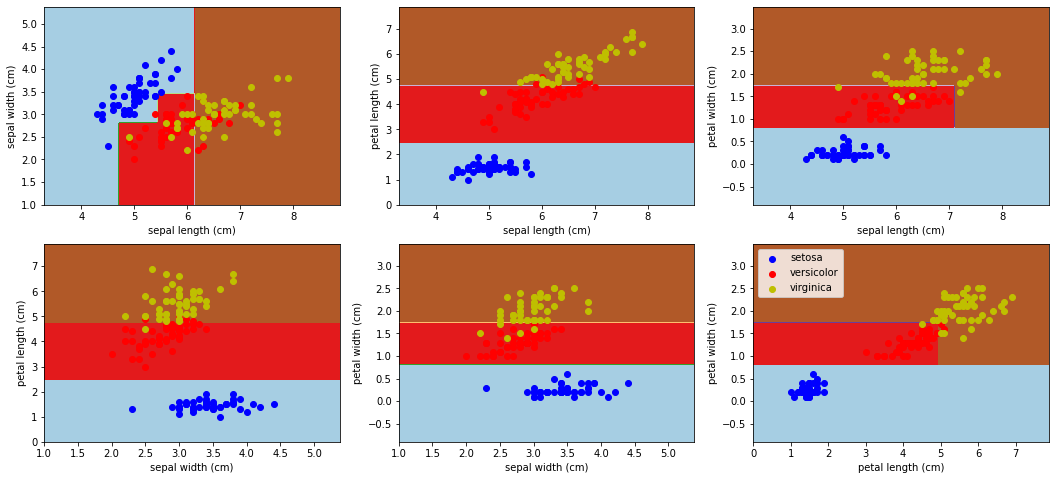

In [34]:
n_classes = 3
plot_colors = 'bry'
plot_step = 0.02

plt.figure(figsize=(18, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    clf = DecisionTreeClassifier(max_depth=3, random_state=10).fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')
plt.legend();

You are probably wondering if that is all. The answer is definitively no, but I ask for your patience. Still missing things like:

* Why did we do that data division in train/test?
* How do we know which models are good?
* Is there a way to measure and compare models?

Soon we will be able to answer these questions.

---
## Decision Tree Regression - TO-DO

Now that you know how to use a Decision Tree Classifier, I challenge you to investigate the [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor), for this you can use the Scikit-Learn __load_diabetes()__ dataset

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

---
## Reference

- [Towards Data Science: Scikit-Learn Decision Trees Explained](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d)